Projekt dotyczy analizy danych zawartych w zbiorze dotyczącym osiągnięć uczniów szkół średnich z dwóch portugalskich szkół.

Dane zawierają oceny uczniów, cechy demograficzne, społeczne i szkolne.

Używam bibliotek:

In [91]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

Pobieram dane:

In [104]:
student_performance = fetch_ucirepo(id=320)
student_performance.data.features

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0    ...    yes       no        no       4         3     4    1    1      3   
1    ...    yes      yes        no       5         3     3    1    1      3   
2    ...    yes      yes        no       4         3     2    2    3      3   
3    ...    yes      yes       yes       3         2     2    1    1      5   
4    ...    yes       no        no       4         3     2    1    2      5   
..   ...    ...      ...       ...     ...       ...   ...  ...  ...    ...   
644  ...    yes      yes        no       5         4     2    1    2      5   
645  ...    yes      yes        no       4         3     4    1    1      1   
646  ...    yes       no        no       1         1     1    1    1      5   
647  ...    yes      yes        no       2         4     5    3    4      2   
648  ...    yes      yes        no       4         4     1    3    4      5   

    absences  
0          4  
1          2  
2          6  
3          0  
4          0  
..       ...  
644        4  
645        4  
646        6  
647        6  
648        4  

[649 rows x 30 columns]

In [93]:
columns_to_hot_encode = []
for col in student_performance.data.features:
    if (student_performance.data.features[col].dtype == 'object'):
        columns_to_hot_encode.append(col)
        
features = pd.get_dummies(student_performance.data.features, columns=columns_to_hot_encode)

In [94]:
student_performance = fetch_ucirepo(id=320)
X =features
y = student_performance.data.targets 

Tworzę macierz korelacji i wybieram 5 najważniejszych parametrów:

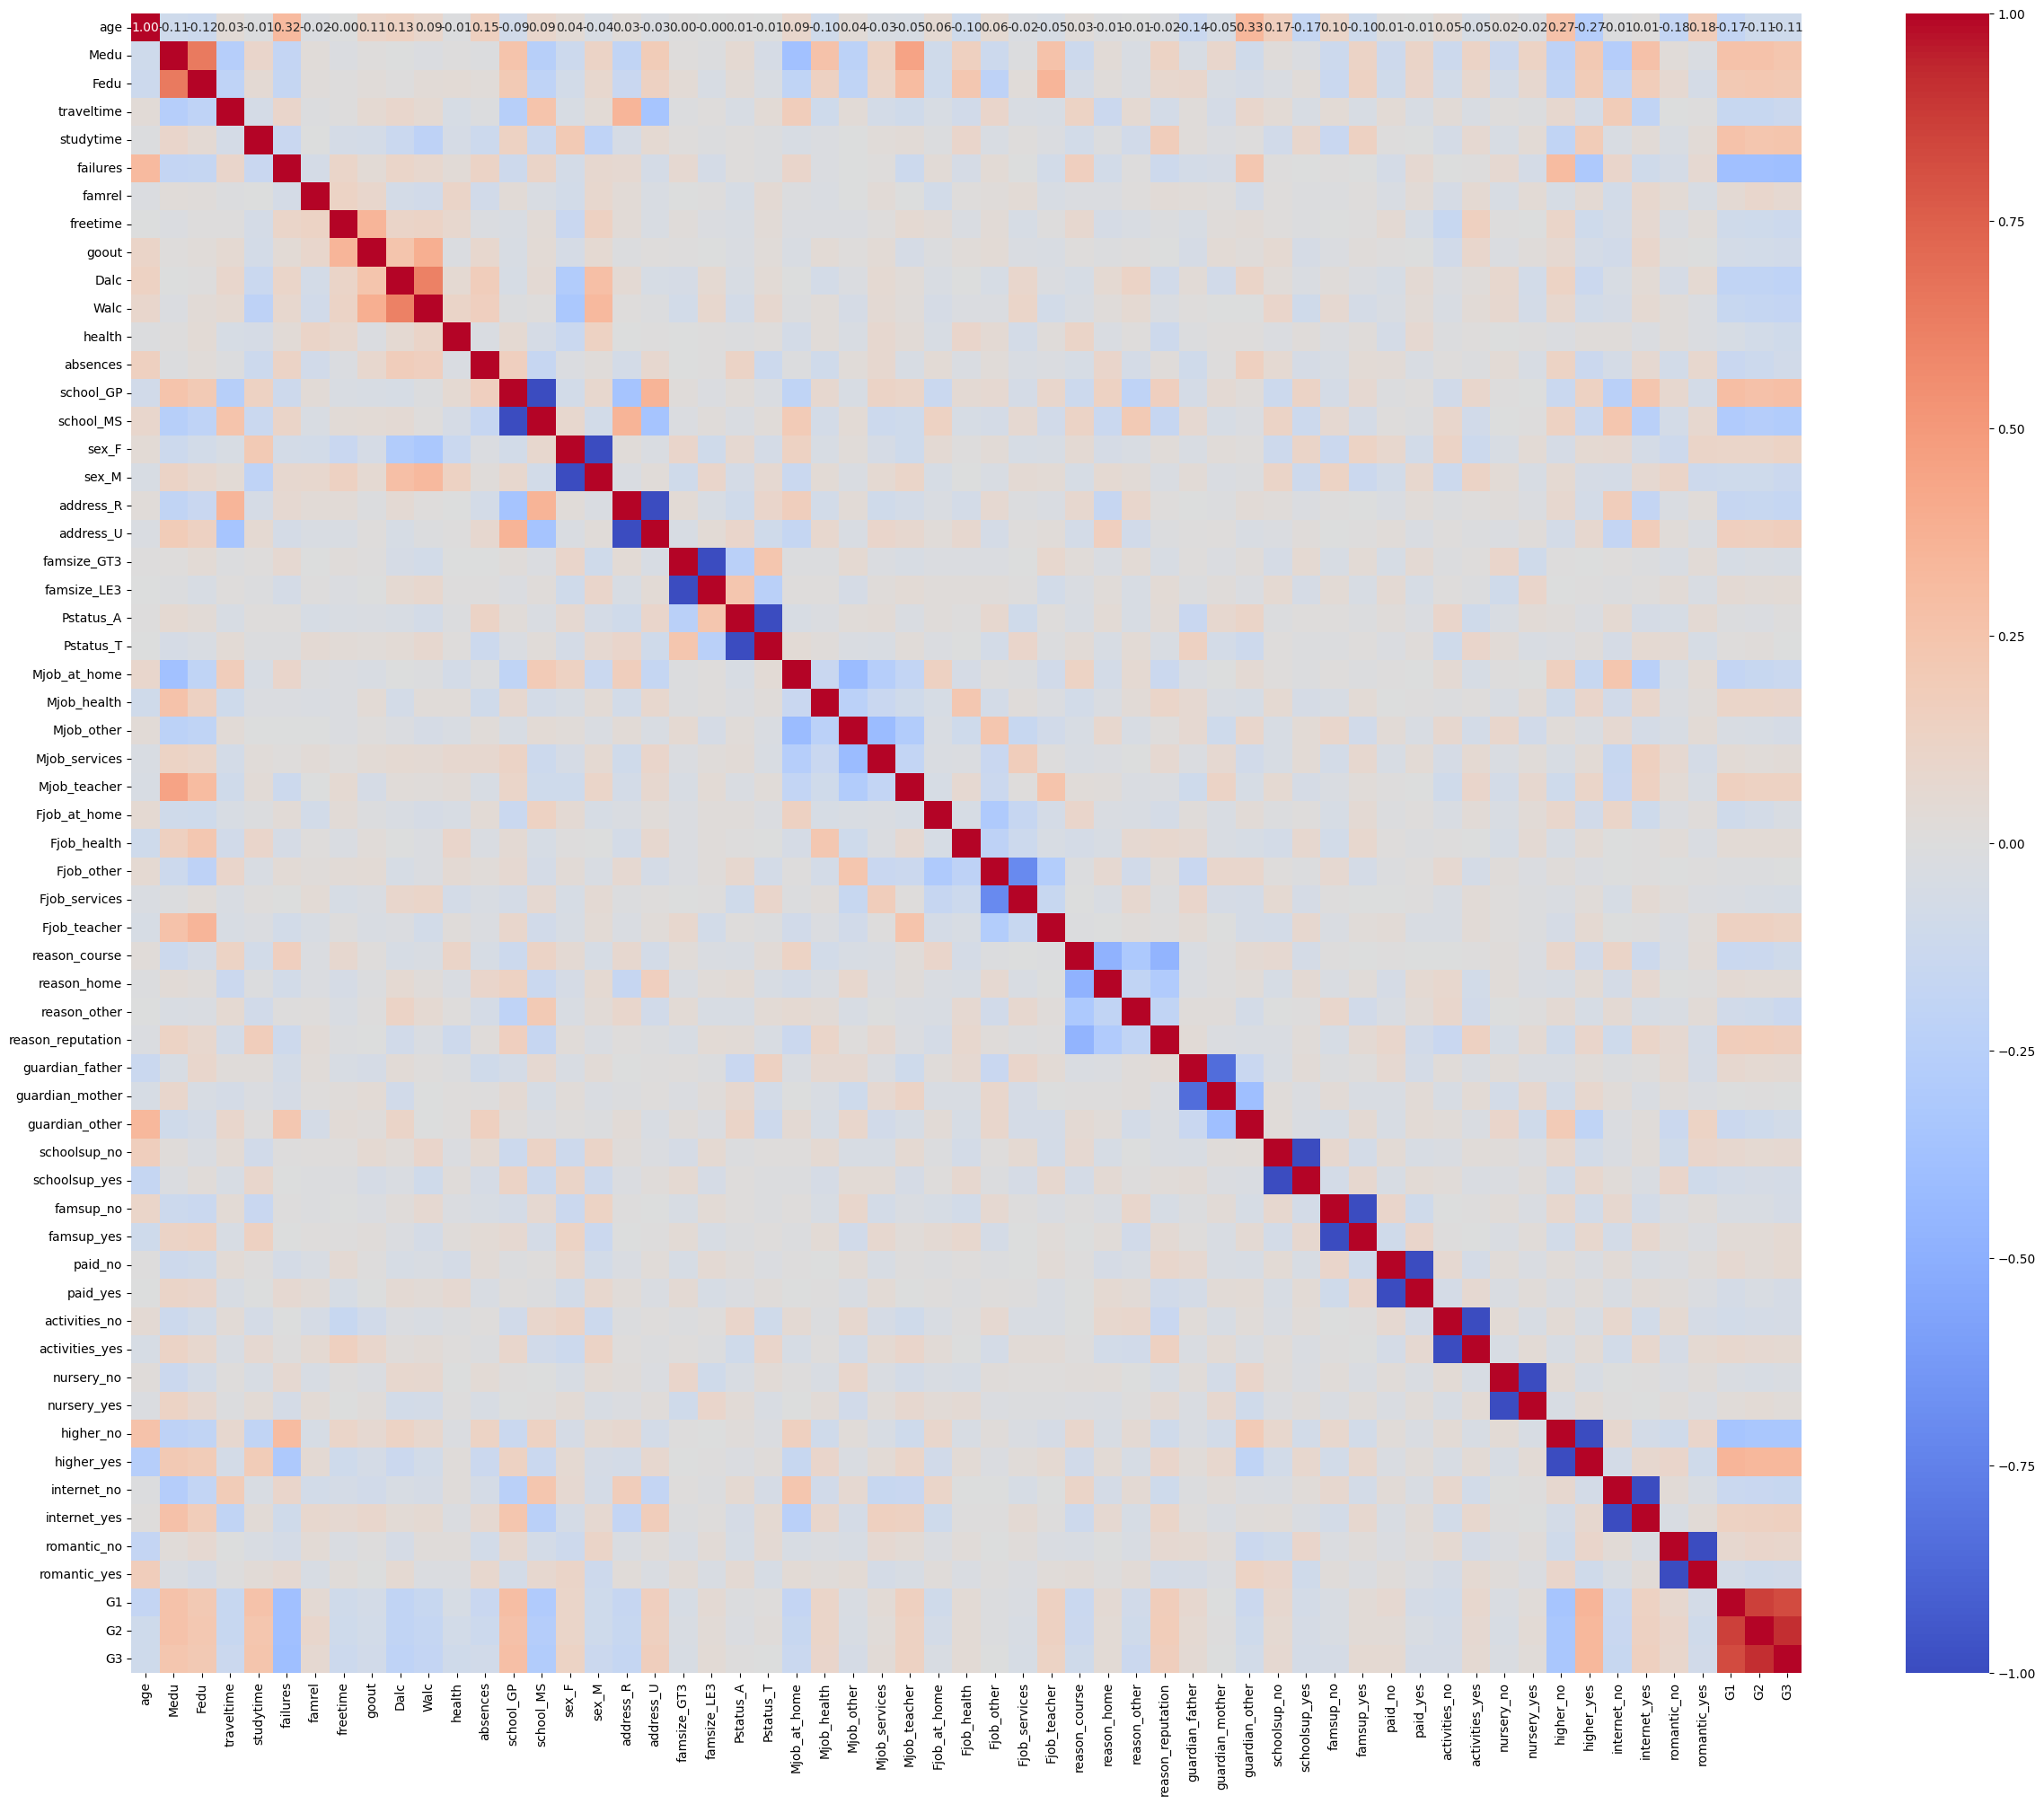

In [106]:
C = pd.concat([X, student_performance.data.targets], axis=1)
correlation_matrix = C.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Z otrzymanej macierzy korelacji można wywnioskować, że największy wpływ na wyniki uczniów mają:
- Wykształcenie matki (Medu).
- Wykształcenie ojca (Fedu).
- Czas nauki (studytime).
- 

In [100]:
important_features = features[['Medu', 'Fedu', 'studytime', 'school_GP', 'higher_yes', "failures"]]
important_features

Medu  Fedu  studytime  school_GP  higher_yes  failures
0       4     4          2       True        True         0
1       1     1          2       True        True         0
2       1     1          2       True        True         0
3       4     2          3       True        True         0
4       3     3          2       True        True         0
..    ...   ...        ...        ...         ...       ...
644     2     3          3      False        True         1
645     3     1          2      False        True         0
646     1     1          2      False        True         0
647     3     1          1      False        True         0
648     3     2          1      False        True         0

[649 rows x 6 columns]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(important_features, y, test_size=0.3, random_state=49)

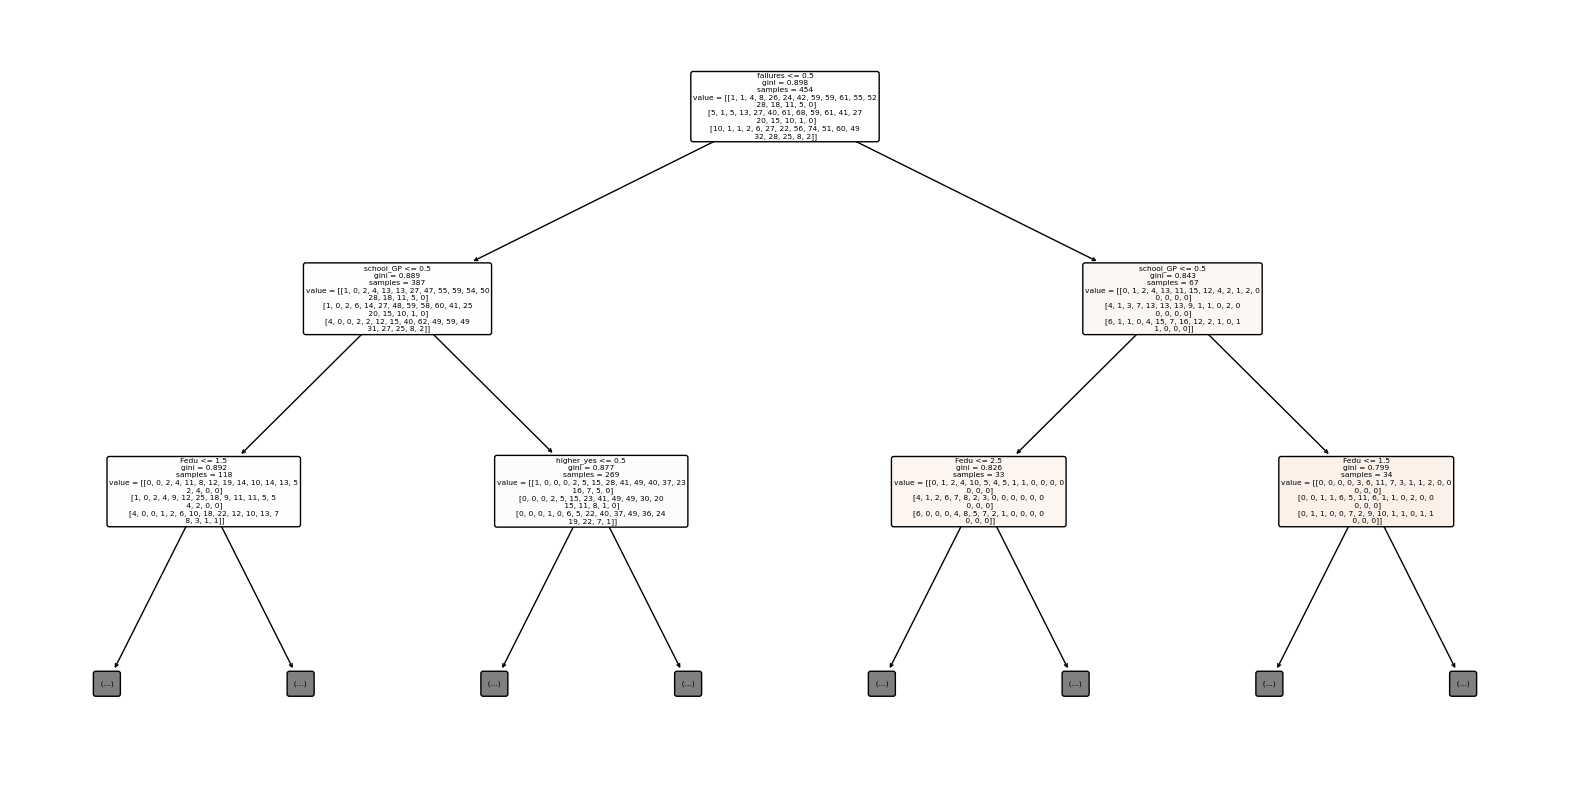

In [103]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          feature_names=X_train.columns, 
          max_depth=2)
plt.show()

In [105]:
y

G1  G2  G3
0     0  11  11
1     9  11  11
2    12  13  12
3    14  14  14
4    11  13  13
..   ..  ..  ..
644  10  11  10
645  15  15  16
646  11  12   9
647  10  10  10
648  10  11  11

[649 rows x 3 columns]